In [2]:
%matplotlib ipympl

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import circmean, circvar
from matplotlib.animation import FuncAnimation

import seaborn as sns

from matplotlib import rc
import yaml
import os

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5') # conda create -n newenv -c conda-forge ffmpeg


with open("cal-settings.yml", 'r') as file:
    vars = yaml.safe_load(file)
    RX_TX_SAME_CHANNEL = vars["RX_TX_SAME_CHANNEL"]


print("Cable connections")
if RX_TX_SAME_CHANNEL:
    REF_RX_CH = FREE_TX_CH = 0
    LOOPBACK_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH0 RX\nCH1 TX-->CH1 RX\nCH0 TX -->")
else:
    LOOPBACK_RX_CH = FREE_TX_CH = 0
    REF_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH1 RX\nCH1 TX-->CH0 RX\nCH0 TX -->")


Cable connections

PLL REF-->CH0 RX
CH1 TX-->CH1 RX
CH0 TX -->


In [3]:
# data:
# 16-port splitter: "20240819131041"
# dual splitter: 20240821123542
# dual splitter: 20240822121928
# INTERNAL 10MHZ and PPS: data_T04_20240822134003


# timestamp = "data_T03_20240829125353_1"  # with 16-port splitter: "20240819131041"


# res = np.load("data_T03_20240829125353_1.npy")[25000:]


# res2 = np.load("data_T03_20240829125353_1.npy")[25000:]

In [4]:
# print(np.rad2deg(np.angle(res)))


# median_angle = np.arctan2(np.median(np.sin(np.angle(res))), np.median(np.cos(np.angle(res))))
# print(np.rad2deg(median_angle))

# print(np.rad2deg(np.mean(np.angle(res))))
# print(np.rad2deg(circmean(np.angle(res2))))

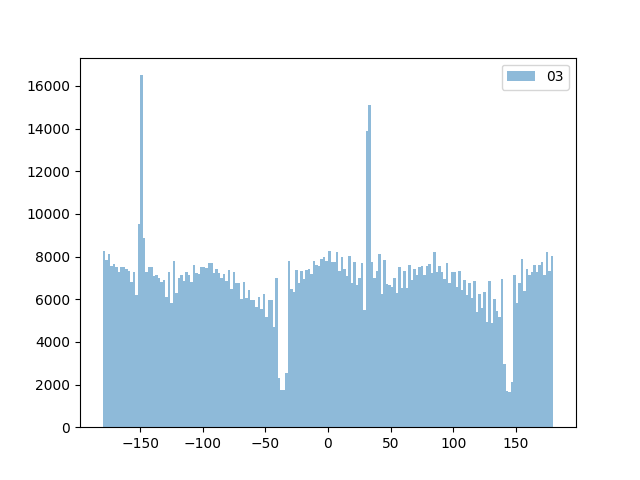

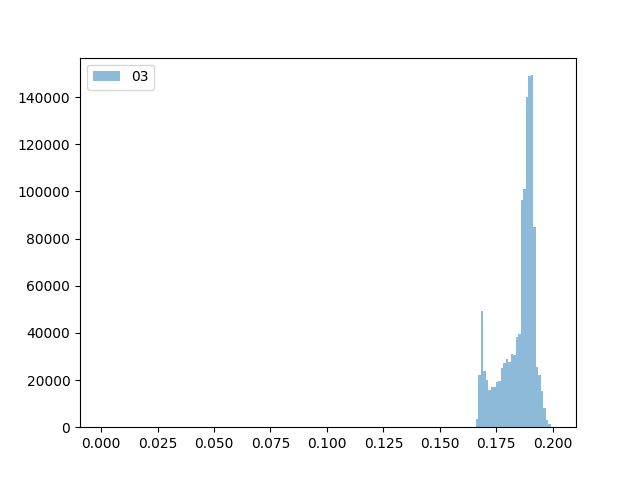

In [5]:
plt.figure()
res = np.load(f"data_T03_20240830075856_1.npy")


bins = 180
plt.hist(


    np.rad2deg(np.angle(res)), bins=bins, label="03", alpha=0.5

)  # arguments are passed to np.histogram
plt.legend()


plt.show()

plt.figure()
bins = 180
plt.hist(
    np.abs(res), bins=bins, label="03", alpha=0.5
)  # arguments are passed to np.histogram
plt.legend()
plt.show()

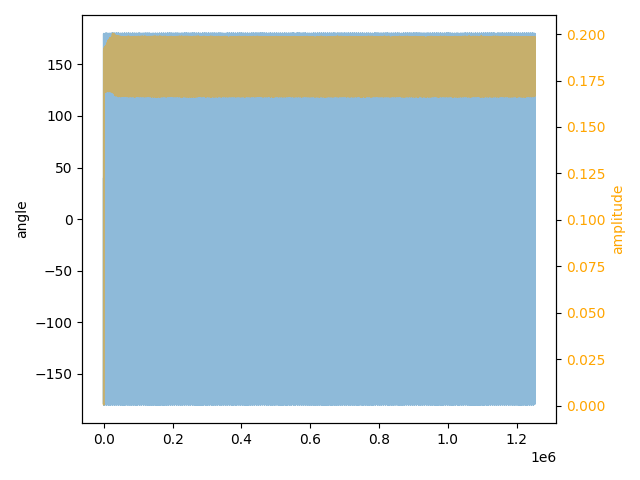

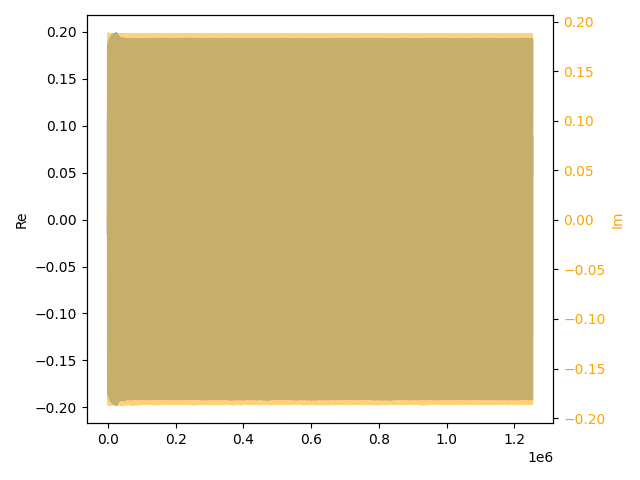

In [6]:
fig, ax1 = plt.subplots()


ax1.set_ylabel("angle")
ax1.plot(np.rad2deg(np.angle(res)), alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("amplitude", color="orange")
ax2.plot(np.abs(res), color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange")

fig.tight_layout()
plt.show()


fig, ax1 = plt.subplots()

ax1.set_ylabel("Re")
ax1.plot(np.real(res), alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("Im", color="orange")
ax2.plot(np.imag(res), color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange") 

fig.tight_layout()
plt.show()

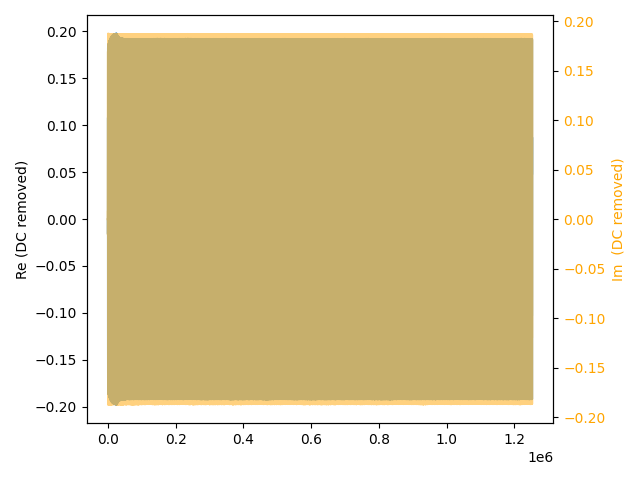

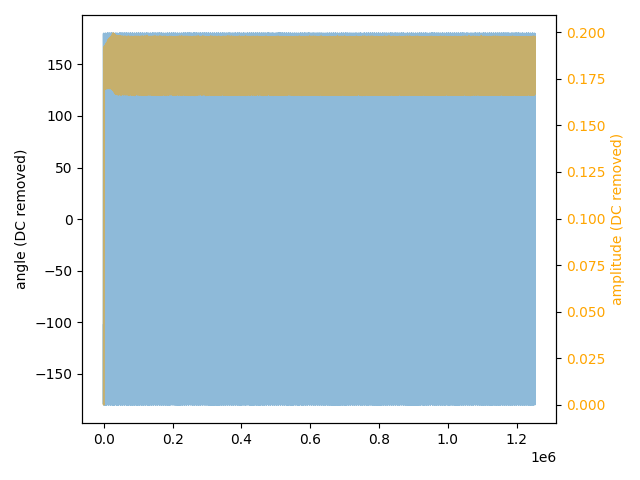

In [7]:
fig, ax1 = plt.subplots()

re = np.real(res) - np.mean(np.real(res))
imag = np.imag(res) - np.mean(np.imag(res))

ax1.set_ylabel("Re (DC removed)")
ax1.plot(re, alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("Im  (DC removed)", color="orange")
ax2.plot(imag, color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange")

fig.tight_layout()
plt.show()


fig, ax1 = plt.subplots()

iq_no_dc = re + 1j * imag

ax1.set_ylabel("angle (DC removed)")
ax1.plot(np.rad2deg(np.angle(iq_no_dc)), alpha=0.5)
ax2 = ax1.twinx()

ax2.set_ylabel("amplitude (DC removed)", color="orange")
ax2.plot(np.abs(iq_no_dc), color="orange", alpha=0.5)
ax2.tick_params(axis="y", labelcolor="orange")

fig.tight_layout()
plt.show()

27.253872602813317
34.785706


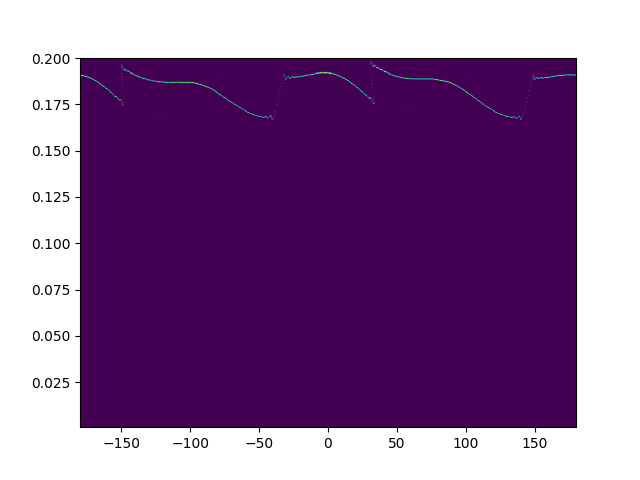

In [8]:
import numpy as np 

# res = np.load("data_T04_20240821134534_30.npy")[25000:]

valid_angles = np.angle(res);
valid_ampl = np.abs(res);


def circmedian(angs):
    return np.arctan2(np.median(np.sin(angs)), np.median(np.cos(angs)))


counts, xedges, yedges = np.histogram2d(valid_angles, valid_ampl, bins=720)
# https://stackoverflow.com/questions/60060017/how-do-i-find-the-bin-with-the-highest-count-using-np-hist2d
x_ind, y_ind = np.unravel_index(np.argmax(counts), counts.shape)
print(np.rad2deg((xedges[x_ind]+xedges[x_ind+1])/2))
print(np.rad2deg(circmedian(valid_angles)))

plt.figure()

plt.hist2d(np.rad2deg(valid_angles), valid_ampl, bins=720)
plt.show()

# x = valid_angles
# y = valid_ampl

# x_ind, y_ind = np.unravel_index(np.argmax(counts), counts.shape)
# print(f'The maximum count is {counts[x_ind][y_ind]:.0f} at index ({x_ind}, {y_ind})')
# print(f'The values are ({valid_angles[x_ind]}, {valid_ampl[y_ind]})')
# print(f'Between x values {xedges[x_ind]} and {xedges[x_ind+1]}')
# print(f'and between y values {yedges[y_ind]} and {yedges[y_ind+1]}')

# fig, ax = plt.subplots(ncols=1)

# ax.imshow(counts.T, origin='lower')
# ax.plot(x_ind, y_ind, 'or')
# ax.set_title('heatmap')

# plt.show()

C:\Users\Calle\AppData\Local\Temp\ipykernel_21520\2961677156.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 10*np.log10(abs(h)), label="order = %d" % order)


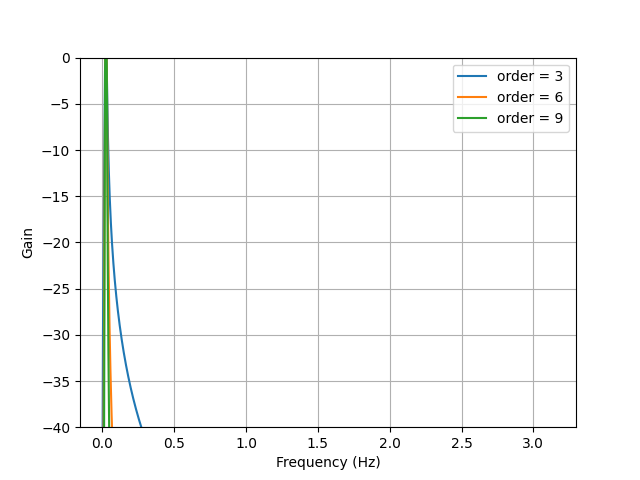

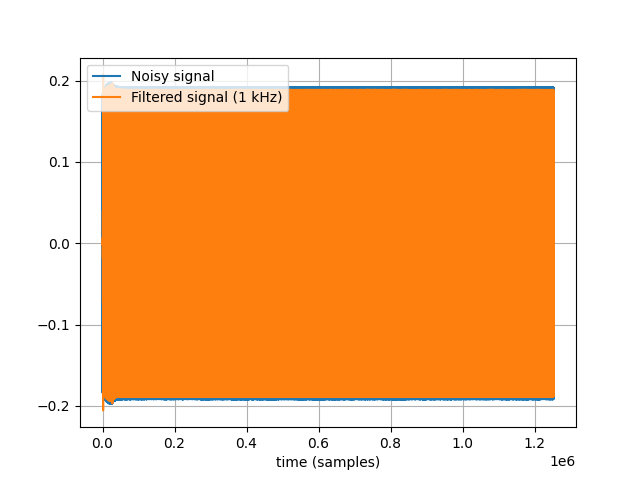

In [9]:
from scipy.signal import butter, sosfilt, sosfreqz


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    sos = butter(order, [low, high], analog=False, btype="band", output="sos")
    return sos


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    y = sosfilt(sos, data)
    return y


import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
f0 = 1e3
cutoff = 250
fs = 250.0e3
lowcut = f0-cutoff
highcut = f0 + cutoff

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    sos = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = sosfreqz(sos, worN=2000)
    plt.plot(w, 10*np.log10(abs(h)), label="order = %d" % order)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.grid(True)
plt.legend(loc="best")
plt.ylim(-40,0)
plt.show()

plt.figure(2)
plt.clf()
plt.plot(re, label="Noisy signal")

y = butter_bandpass_filter(re, lowcut, highcut, fs, order=9)
plt.plot(y, label="Filtered signal (1 kHz)")
plt.xlabel("time (samples)")
plt.grid(True)
plt.axis("tight")
plt.legend(loc="upper left")
plt.show()

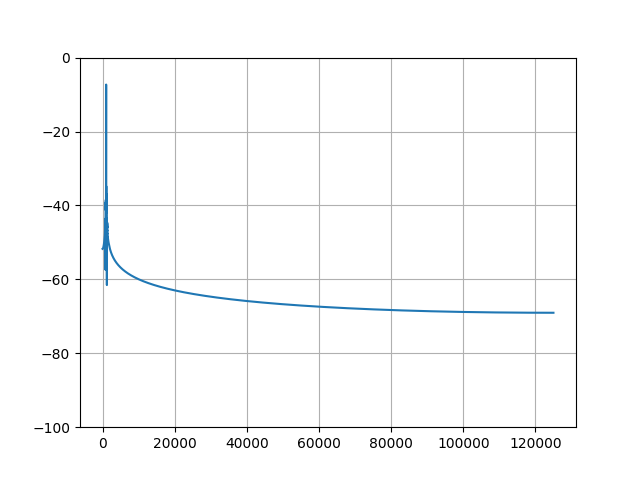

In [10]:
from scipy.fft import fft, fftfreq

plt.figure()
yf = fft(y)
N = len(y)
T = 1.0/fs
xf = fftfreq(N, T)[: N // 2]
plt.plot(xf,10*np.log10( 2.0 / N * np.abs(yf[0 : N // 2])))
plt.ylim(-100,0)
plt.grid()
plt.show()

$$ I = \cos{(2\pi \Delta f t + \phi)} $$
$$ Q = \sin{(2\pi \Delta f t + \phi)} $$

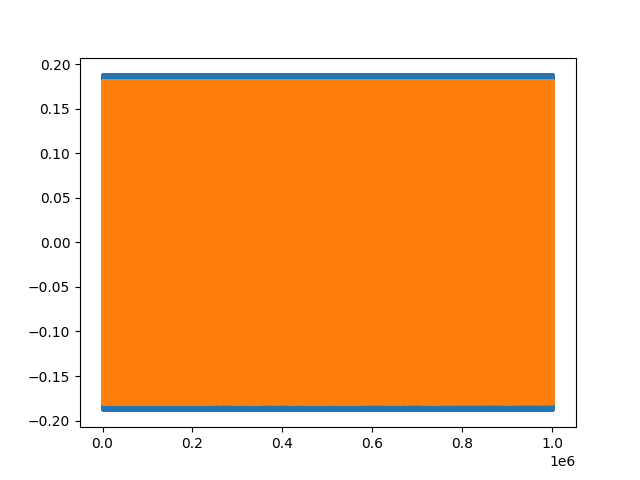

1000.1677048594581


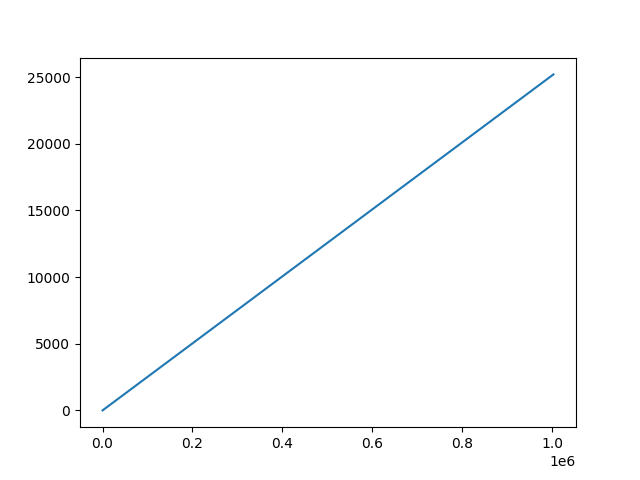

69.12789421968128


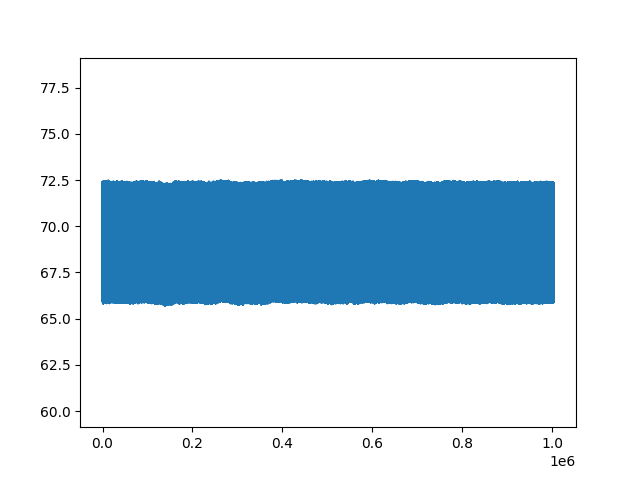

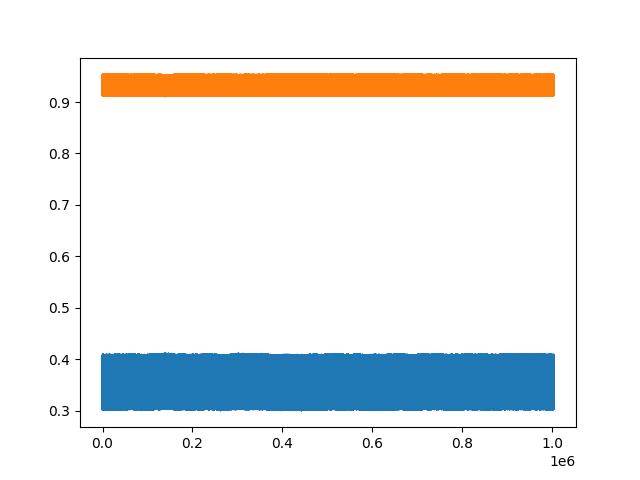

In [11]:
from scipy import stats

y_re = butter_bandpass_filter(re, lowcut, highcut, fs, order=9)[250000:]
y_imag = butter_bandpass_filter(imag, lowcut, highcut, fs, order=9)[250000:]

plt.figure()
plt.plot(y_re)
plt.plot(y_imag)
plt.show()


angle_unwrapped = np.unwrap(np.angle(y_re + 1j * y_imag))
time = np.arange(0, len(y_re)) * (1 / fs)

res = stats.linregress(time, angle_unwrapped) # equals deltaF*2 pi *t + phi
freq_offset = res.slope / (2*np.pi)
print(freq_offset)
plt.figure()

plt.plot(angle_unwrapped)
plt.show()


phase_rad = angle_unwrapped - res.slope * time
phase = np.rad2deg(phase_rad)
avg_phase = np.mean(phase)
print(avg_phase)
plt.figure()
plt.plot(phase)
plt.ylim(avg_phase-10,avg_phase+10)
plt.show()


plt.figure()
plt.plot(np.cos(phase_rad))
plt.plot(np.sin(phase_rad))
plt.show()

1000.0000007254067
4.998812172445073


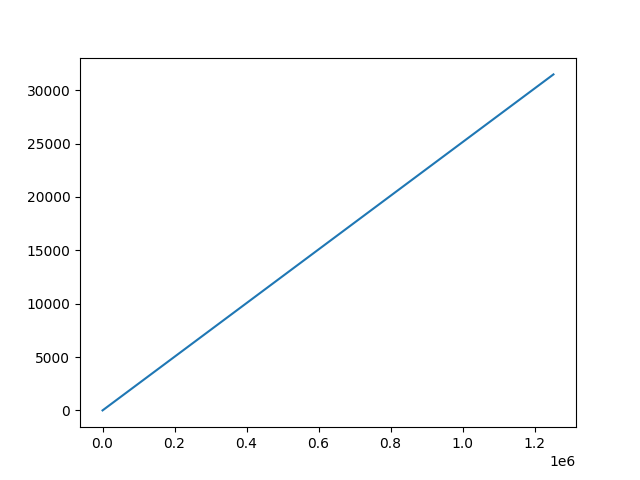

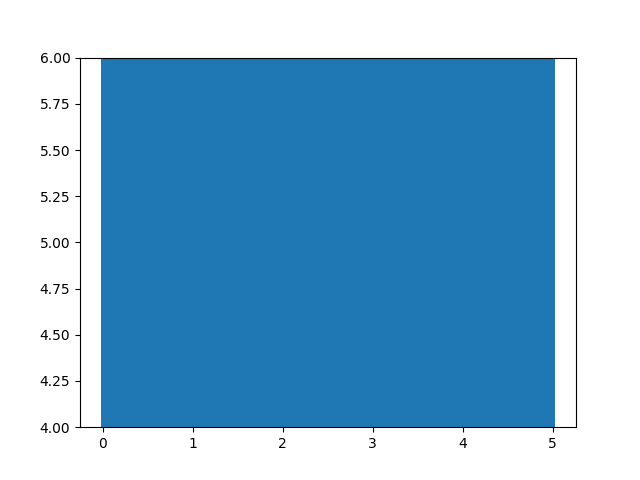

In [15]:
from scipy import stats


time = np.arange(0, len(re)) * (1 / fs)
phi = np.deg2rad(5)
deltaF = 1e3
noise = np.random.normal(0, 0.01, len(time))
y_re = np.cos(2 * np.pi * deltaF * time + phi + noise)
y_imag = np.sin(2 * np.pi * deltaF * time + phi + noise)

angle_unwrapped = np.unwrap(np.angle(y_re + 1j * y_imag))


res = stats.linregress(time, angle_unwrapped)  # equals deltaF*2 pi *t + phi
freq_offset = res.slope / (2 * np.pi)
print(freq_offset)
print(np.rad2deg(res.intercept))
plt.figure()

plt.plot(angle_unwrapped)
plt.show()


phase = np.rad2deg(angle_unwrapped - res.slope * time)
plt.figure()
plt.plot(time, phase)
plt.ylim(4,6)
plt.show()